# Plot experimental data for the Sniffing Sensor

This uses functions from the sniffing-sensor repo. 
Code assumes your working directory is the sniffing-sensor main folder.

In [1]:
# Standard
from collections import OrderedDict

# Third party
import matplotlib.pyplot as plt
import pandas as pd

# Sniffing-sensor
from data.datasets import Dataset, COLOR_DICT as color_dict
from data.sniffing_datasets import AlkanesShortSniff
from data.data_functions import (
        DataLoader, 
        PhaseTransform, 
        NormalizePhaseTransform, 
        SNIFFING_PATH
    )
from data.plot_functions import plot_array_data

## Replace the data in `exp_data`

- Each key corresponds to the label of your plot
- Each value lists the file names for each experiment (without `.csv`).
These experiments will be averaged.

NOTE: `SNIFFING_PATH` points to `data/sniffing_data`.
It will be easiest to put your data there too.
You can use `prefix` to specify a subfolder inside of `SNIFFING_PATH`.

In [2]:
# Sniffing experimtents performed by Anna and Haritosh (before 10/23/22()

prefix = "Anna_Haritosh_data"
exp_data = OrderedDict([
    ('Hexane_shallow', ['hexane_shallow_01', 'hexane_shallow_02', 'hexane_shallow_03']),
    ('Hexane_medium', ['hexane_medium_01', 'hexane_medium_02', 'hexane_medium_03']),
    ('Hexane_deep', ['hexane_deep_01', 'hexane_deep_02', 'hexane_deep_03']),
    ('Heptane_shallow', ['heptane_shallow_01', 'heptane_shallow_02', 'heptane_shallow_03']),
    ('Heptane_medium', ['heptane_medium_01', 'heptane_medium_02', 'heptane_medium_03']),
    ('Heptane_deep', ['heptane_deep_01', 'heptane_deep_02', 'heptane_deep_03']),
])

ah_data = Dataset(exp_data)

I used this function to convert Anna and Haritosh's file format to match Ethan's files.
I placed the files from Anna and Haritosh inside of the subfolder (`prefix`) in `SNIFFING_PATH` in a folder called `original`.

In [3]:
ans = input('Do you want to reformat the data files? (y/n)') or 'n'
if ans.lower().startswith('y'):
    # Reformat files
    for _, values in exp_data.items():
        for value in values:
            data = pd.read_csv(SNIFFING_PATH.joinpath(prefix, f"original/{value}.csv"), header=1)
            data.drop(["Recipe Command"], axis=1, inplace=True)
            data.set_index("Experiment Time (s)", inplace=True)
            data = data.transpose()
            data.reset_index().rename(columns={'index': 'Wavelengths'}, inplace=True)
            data.to_csv(SNIFFING_PATH.joinpath(prefix, f"{value}.csv"))
            

##### Get data files and plot

In [4]:
ah_phase, ah_labels = DataLoader(ah_data, transforms=[PhaseTransform, NormalizePhaseTransform], folder=SNIFFING_PATH.joinpath(prefix)).load()

Loading experimental data
Hexane_shallow (1/6): [===================0] 100% complete
Hexane_medium (2/6): [===================0] 100% complete
Hexane_deep (3/6): [===================0] 100% complete
Heptane_shallow (4/6): [===================0] 100% complete
Heptane_medium (5/6): [===================0] 100% complete
Heptane_deep (6/6): [===================0] 100% complete
Length of experimental set loaded: 18


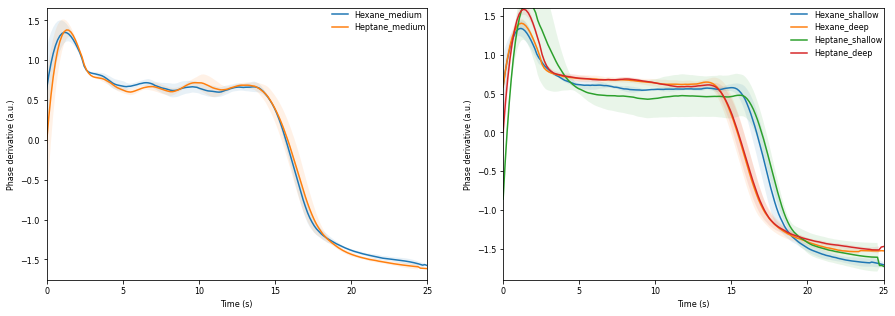

In [5]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

plot_array_data({k:v for k,v in ah_data.items() if 'medium' in k}, ah_phase, [0,25], color_dict = color_dict, ax=axes[0])
plot_array_data({k:v for k,v in ah_data.items() if not 'medium' in k}, ah_phase, [0,25], color_dict = color_dict, ax=axes[1])